In [0]:
#import necessary libraries
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets,transforms,models
import torch.nn.functional as F
from torch import nn,optim

from torch.utils.data import Dataset, TensorDataset
from torch.optim import lr_scheduler
from torch.autograd import variable
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision

In [19]:
import gdown 

gdown.download("https://drive.google.com/uc?id={0}".format("1pQ-SE4Cer4CNMndhM6BSR7RuTbvT_FA7"),"sign_mnist_train.csv",quiet = False)

gdown.download("https://drive.google.com/uc?id={0}".format("1whKnw-iBSFNMakIABAIZv7URxsyC5Osp"),"sign_mnist_test.csv",quiet = False)

train_dir='sign_mnist_train.csv'
test_dir='sign_mnist_test.csv'

Downloading...
From: https://drive.google.com/uc?id=1pQ-SE4Cer4CNMndhM6BSR7RuTbvT_FA7
To: /content/sign_mnist_train.csv
83.3MB [00:01, 66.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1whKnw-iBSFNMakIABAIZv7URxsyC5Osp
To: /content/sign_mnist_test.csv
21.8MB [00:00, 130MB/s] 


In [0]:
#we need to customize our data to fit the pytorch model

class Dataset_load(Dataset):
    
    def __init__(self, file_path, transform=None):
        self.data = pd.read_csv(file_path)
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
     
        image = self.data.iloc[index, 1:].values.astype(np.uint8).reshape((28,28,1))
        label = self.data.iloc[index, 0]
        label=np.where(label>8, label-1, label)
        
        if self.transform is not None:
            image = self.transform(image)
        
            
        return image , label
      

In [0]:
#Data Augmentation

data_transforms = {
    'train': transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(25),
        
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], 
                            [0.5])
]),
    
    'valid': transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], 
                             [0.5])
    ]),
}

In [22]:
train_dataset=Dataset_load(train_dir,transform=data_transforms['train'])


num_train = len(train_dataset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(0.2 * num_train))
train_idx, valid_idx = indices[split:], indices[:split]


# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=20,sampler=train_sampler)

valid_loader=torch.utils.data.DataLoader(train_dataset,batch_size=20,sampler=valid_sampler)

test_dataset=Dataset_load(test_dir,transform=data_transforms['valid'])

test_loader =torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)


#figur out the 

images,labels=next(iter(train_loader))

print(images.shape)
print(labels)

print(labels.shape)


torch.Size([20, 1, 28, 28])
tensor([ 1,  9, 14, 22, 14, 22, 22, 22,  5,  5, 13,  3,  1, 15,  2, 15, 20, 11,
        10,  0])
torch.Size([20])


In [0]:
letters={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'k',10:'L',11:'M',12:'N',13:'O',14:'P',15:'Q',16:'R',17:'S',18:'T',19:'U',20:'V',21:'W',22:'X',23:'Y'}

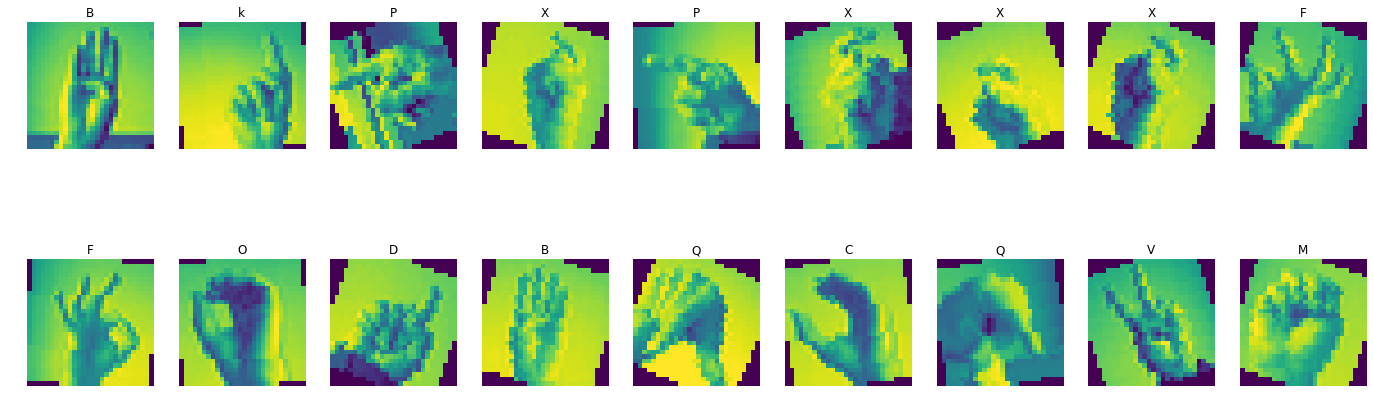

In [27]:
plt.figure(figsize=(24,8))

for i in range(18):
  
  plt.subplot(2,9,i+1)
  plt.imshow(images[i].numpy().reshape(28,28))
  plt.axis('off')
  plt.title(letters[int((labels[i]))])

**then the rest of code ............**